In [1]:
import pandas as pd

In [2]:
%matplotlib notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
lawrencedf = pd.read_csv('C:\\Users\\Heejoung Shin\\Documents\\Heejoung Files\\UIUC MSLIS\\IS417-Data Science in the Humanities\\Research Paper\\Data\\lawrence_100sims.csv', encoding = 'utf-8')

In [4]:
lawrencedf

,words,x,y,sentiment
0,sardonic,0.065240,-0.262227,negative
1,strange,0.293499,0.197011,negative
2,odd,-0.204357,-0.163019,negative
3,peculiar,0.164867,-0.356269,negative
4,wild,0.197224,0.335135,negative
...,...,...,...,...
96,wiry,0.477448,-0.192850,neutral
97,deadened,-0.333525,0.184296,neutral
98,scotchman,-0.185705,-0.302357,neutral
99,matthew,0.154252,0.287402,neutral


In [5]:
#lawrencedf.style.hide_index()
lawrencedf = lawrencedf.set_index('words')
lawrencedf

,x,y,sentiment
words,,,
sardonic,0.065240,-0.262227,negative
strange,0.293499,0.197011,negative
odd,-0.204357,-0.163019,negative
peculiar,0.164867,-0.356269,negative
wild,0.197224,0.335135,negative
...,...,...,...
wiry,0.477448,-0.192850,neutral
deadened,-0.333525,0.184296,neutral
scotchman,-0.185705,-0.302357,neutral


In [6]:
plotframe_sentiment = lawrencedf

In [7]:
plotframe_sentiment

,x,y,sentiment
words,,,
sardonic,0.065240,-0.262227,negative
strange,0.293499,0.197011,negative
odd,-0.204357,-0.163019,negative
peculiar,0.164867,-0.356269,negative
wild,0.197224,0.335135,negative
...,...,...,...
wiry,0.477448,-0.192850,neutral
deadened,-0.333525,0.184296,neutral
scotchman,-0.185705,-0.302357,neutral


In [8]:
def plot_the_frame(plotframe_sentiment):    
    plt.figure(figsize = (20, 24))
    color_dict = dict({'positive':'green', 'neutral':'grey','negative':'red','queer':'purple'})
    marker_dict = {'positive':'P', 'neutral':'o','negative':'X','queer':'D'}
    theplot = sns.scatterplot(x = plotframe_sentiment.iloc[ : , 0],
                              y = plotframe_sentiment.iloc[ : , 1],
                              hue=plotframe_sentiment.iloc[ : , 2],
                              palette=color_dict,
                              #style = plotframe_sentiment.iloc[ : , 2],
                              #markers = marker_dict,
                              s = 180,
                             )
    collabels = plotframe_sentiment.columns.tolist()
    theplot.set(xlabel = collabels[0], ylabel = collabels[1])


    for rownum in range(plotframe_sentiment.shape[0]):
        x = plotframe_sentiment.iloc[rownum, 0]
        y = plotframe_sentiment.iloc[rownum, 1]
        theplot.text(x + 0.003,
                     y + .003, 
                     plotframe_sentiment.index[rownum],
                     horizontalalignment='left',
                     #size = "small"
                     color='black',
                     fontsize=18, 
                     #weight='semibold'
                     weight = "normal"
                    )

    plt.title('Sentiments of the Top 100 Words Closest to Queer (Lawrence)', fontsize=24)
    theplot.set_xlabel("PCA dimension 1",fontsize=20)
    theplot.set_ylabel("PCA dimension 2",fontsize=20)
    theplot.tick_params(labelsize=16)
    theplot.legend(fontsize=20)
    plt.savefig("fig-8-5_queersentiment_lawrence_2022-12-07.pdf", dpi=600)
    plt.show()   

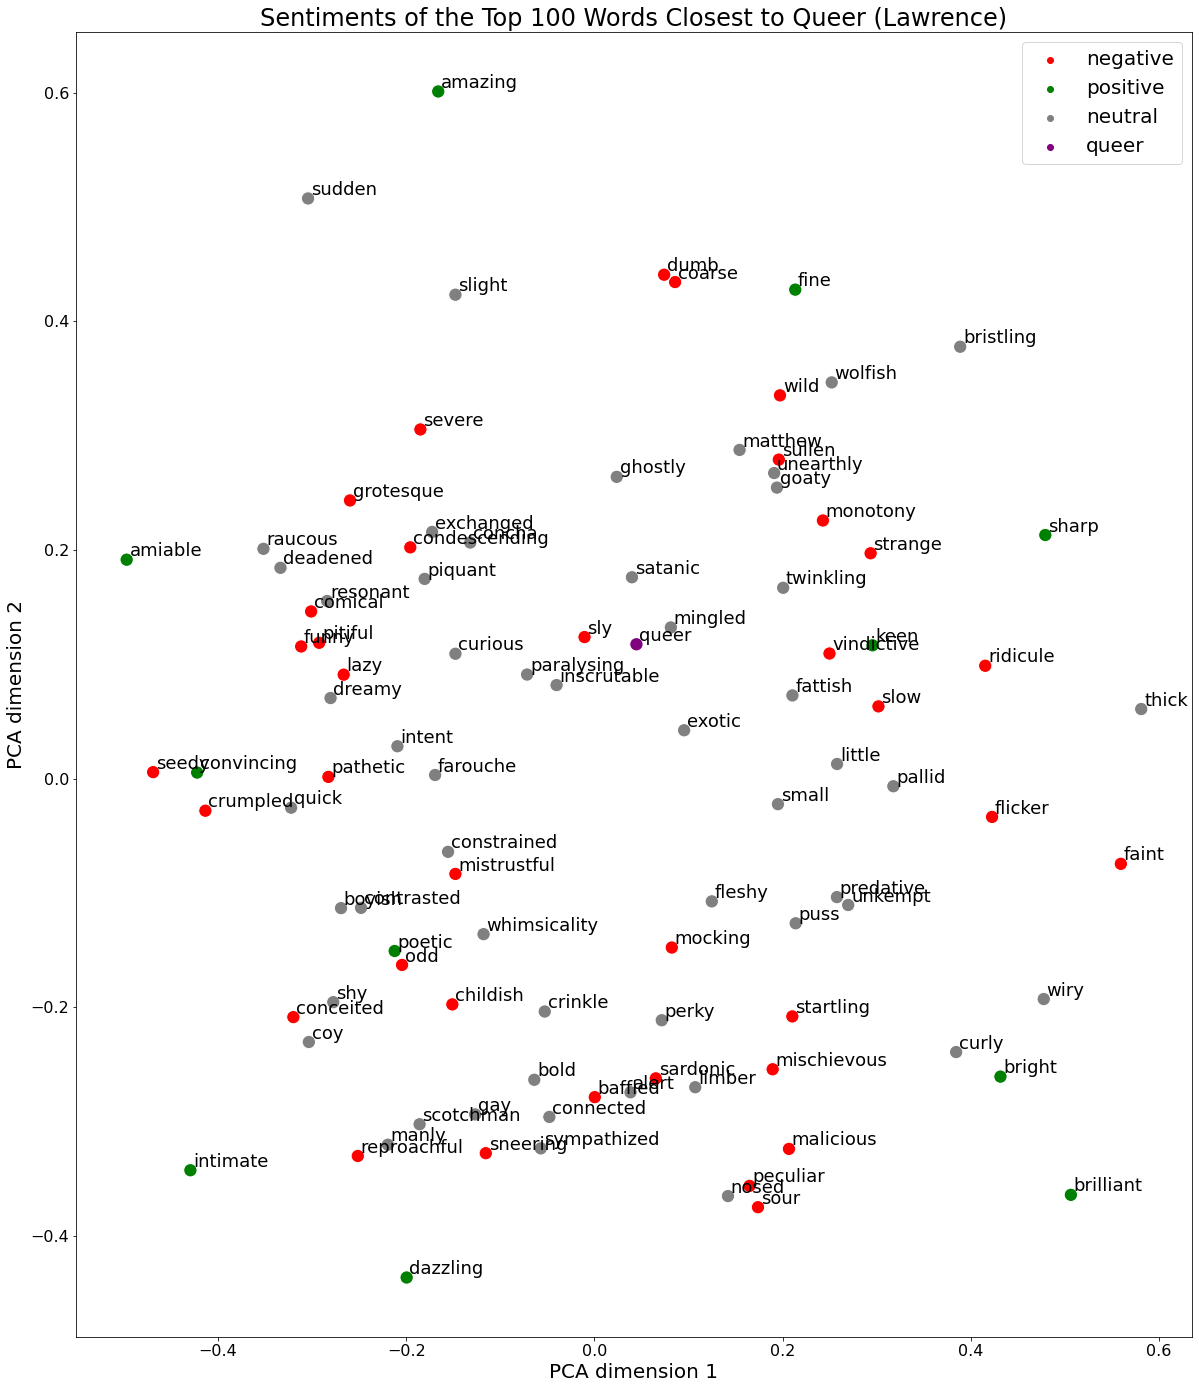

In [9]:
plot_the_frame(plotframe_sentiment)